In [1]:
# RANDOM FOREST REGRESSOR COM SPLIT, GRÁFICO COMBINADO E SCATTER PLOT

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# === Carregar dados ===
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df["MEDV"] = california.target

In [3]:
# Separar features e target
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

In [4]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
# Treinar modelo
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [6]:
# Previsões no conjunto de teste
y_pred = rf_regressor.predict(X_test)

In [7]:
# Avaliação
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.26
R-squared (R²): 0.81


In [8]:
# Ranking textual das features por importância
importances = rf_regressor.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()[::-1]
print("\nRanking das features por importância:")
for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")


Ranking das features por importância:
MedInc: 0.5249
AveOccup: 0.1384
Latitude: 0.0889
Longitude: 0.0886
HouseAge: 0.0546
AveRooms: 0.0443
Population: 0.0306
AveBedrms: 0.0296


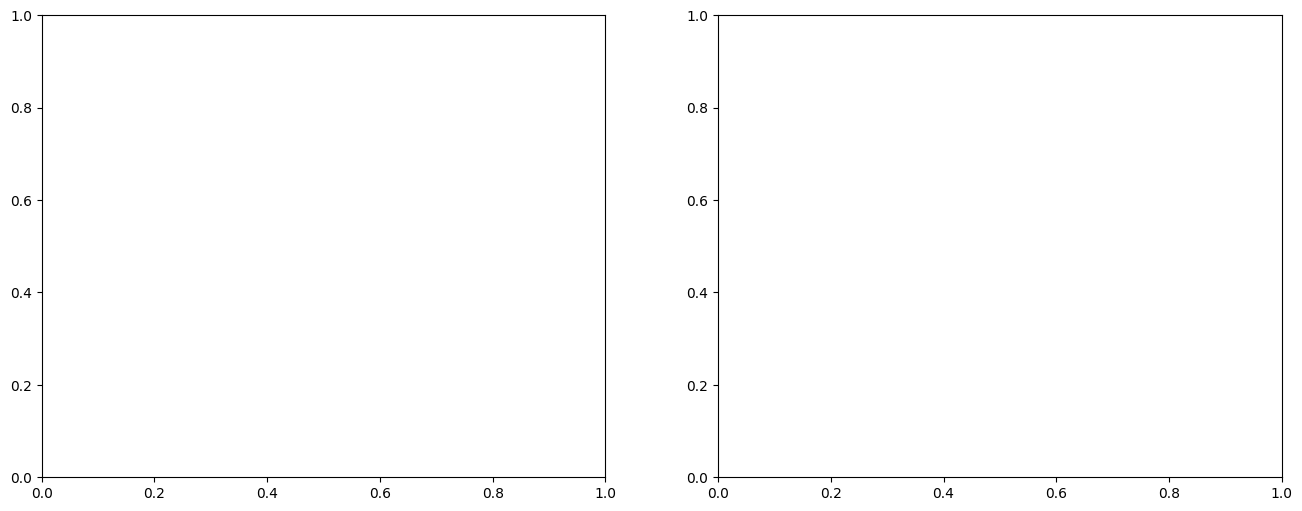

In [9]:
# === Gráfico combinado: correlação + importância ===
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

In [10]:
# Heatmap de correlação
sns.heatmap(
    X.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[0]
)
axes[0].set_title("Correlação entre Features")

Text(0.5, 1.0, 'Correlação entre Features')

In [11]:
# Gráfico horizontal de importância
sorted_features = [feature_names[i] for i in sorted_indices]
sorted_importances = importances[sorted_indices]
bars = axes[1].barh(sorted_features, sorted_importances, color="skyblue")
axes[1].set_xlabel("Importância")
axes[1].set_title("Importância das Features - Random Forest")
axes[1].invert_yaxis()

In [12]:
# Adicionar valores numéricos nas barras
for bar in bars:
    width = bar.get_width()
    axes[1].text(
        width + 0.001, bar.get_y() + bar.get_height() / 2, f"{width:.3f}", va="center"
    )

plt.tight_layout()
plt.savefig("california_feature_analysis.png")
plt.show()

<Figure size 640x480 with 0 Axes>

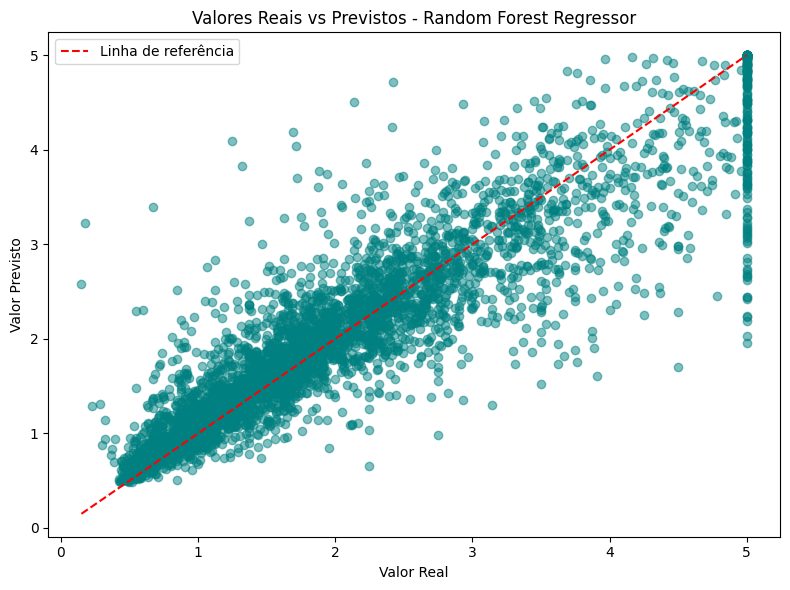

In [13]:
# === Scatter plot: valores reais vs previstos ===
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="teal")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--",
    label="Linha de referência",
)
plt.xlabel("Valor Real")
plt.ylabel("Valor Previsto")
plt.title("Valores Reais vs Previstos - Random Forest Regressor")
plt.legend()
plt.tight_layout()
plt.savefig("california_prediction_scatter.png")
plt.show()